In [4]:
import pathlib
import platform
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [8]:
segy_file = pathlib.Path("/Users/kavehdehghan/Desktop/ML_WORKFLOW/Seismic_Data/FullStack_Decim.sgy")
print("SEGY file exists", segy_file.exists())

SEGY file exists True


In [6]:
from segysak.segy import segy_header_scan, segy_header_scrape, get_segy_texthead

In [9]:
#example the text_header
get_segy_texthead(segy_file)

Text HeaderC01   SEG-Y exported from OpendTect 7.0.6b at Thu 08 Aug 2024, 17:44:08, CE
C02   Survey:       Poseidon_3D
C03   Data name:    FullStack_Decim
C04  ----------------------------------------------------------------------
C05   Corner 1:  X: 416132.22  Y: 8447593.90  IL: 983  XL: 504
C06   Corner 2:  X: 367756.42  Y: 8488186.96  IL: 983  XL: 5556
C07   Corner 3:  X: 409169.20  Y: 8537539.64  IL: 4419  XL: 5556
C08   Corner 4:  X: 457545.00  Y: 8496946.58  IL: 4419  XL: 504
C09   Bin size:  18.75 x 12.50 (m)
C10   Projection: [EPSG:28351] GDA94 / MGA zone 51
C11  ----------------------------------------------------------------------
C12   In-line:      983-4419    inc: 1
C13   Cross-line:   504-5556    inc: 1
C14   Z (ms):       2500-4000   inc: 4
C15  ----------------------------------------------------------------------
C16   In-line byte:          189-192
C17   Cross-line byte:       193-196
C18   X-Coord byte:          181-184
C19   Y-Coord byte:          185-188
C20  ----------------------------------------------------------------------
C21
C22
C23
C24
C25
C26
C27
C28
C29
C30
C31
C32
C33
C34
C35
C36
C37
C38
C39   SEG-Y REV1
C40   END TEXTUAL HEADER

In [10]:
# scan the headers to check
scan = segy_header_scan(segy_file, max_traces_scan=2000)
scan

  0%|          | 0.00/2.00k [00:00<?, ? traces/s]

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,535.348,342.089724,1.0,250.75,500.5,764.25,1264.0
TRACE_SEQUENCE_FILE,5,2000.0,1000.500,577.494589,1.0,500.75,1000.5,1500.25,2000.0
FieldRecord,9,2000.0,984.472,1.929528,983.0,983.00,983.0,987.00,987.0
TraceNumber,13,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...
SourceEnergyDirectionMantissa,219,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceEnergyDirectionExponent,223,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementMantissa,225,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
SourceMeasurementExponent,229,2000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0


In [11]:
with pd.option_context("display.max_rows", 100):
    display(scan)

,byte_loc,count,mean,std,min,25%,50%,75%,max
TRACE_SEQUENCE_LINE,1,2000.0,5.353480e+02,342.089724,1.0,250.75,500.5,764.25,1264.0
TRACE_SEQUENCE_FILE,5,2000.0,1.000500e+03,577.494589,1.0,500.75,1000.5,1500.25,2000.0
FieldRecord,9,2000.0,9.844720e+02,1.929528,983.0,983.00,983.0,987.00,987.0
TraceNumber,13,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
EnergySourcePoint,17,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
CDP,21,2000.0,2.641392e+03,1368.358898,504.0,1503.00,2502.0,3557.00,5556.0
CDP_TRACE,25,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
TraceIdentificationCode,29,2000.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
NSummedTraces,31,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0
NStackedTraces,33,2000.0,0.000000e+00,0.000000,0.0,0.00,0.0,0.00,0.0


In [16]:
trace_headers = segy_header_scrape(segy_file, chunk=2000)
trace_headers[["INLINE_3D","CROSSLINE_3D"]]


  0%|          | 0.00/1.09M [00:00<?, ? traces/s]

,INLINE_3D,CROSSLINE_3D
0,983,504
1,983,508
2,983,512
3,983,516
4,983,520
...,...,...
1087035,4419,5540
1087036,4419,5544
1087037,4419,5548
1087038,4419,5552


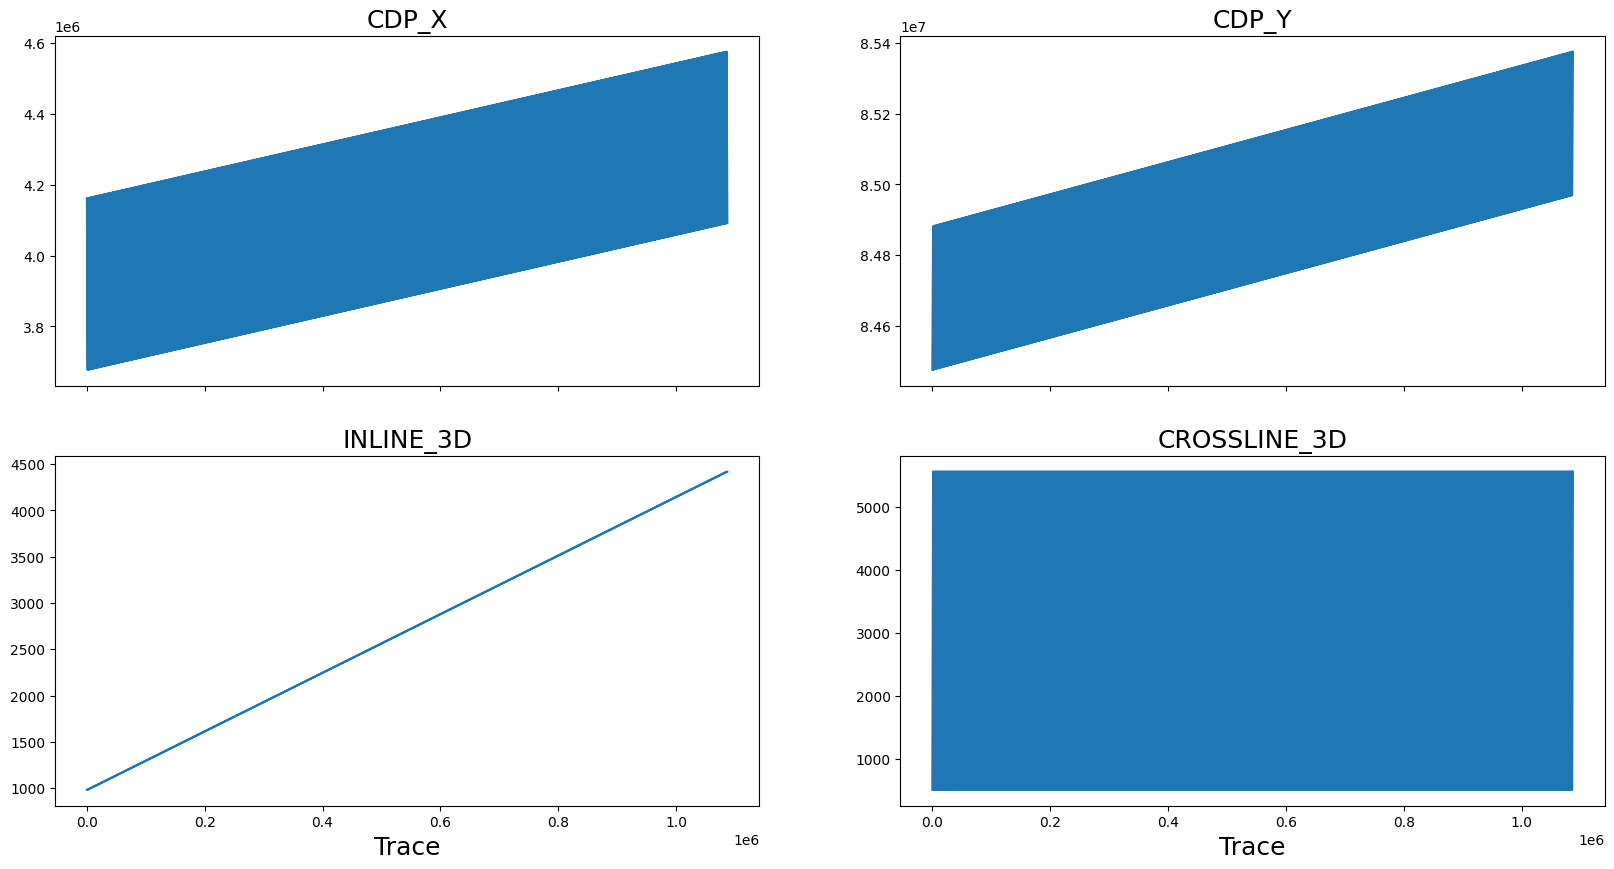

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10),sharex=True)

for ax, prop in zip(axs.ravel(),["CDP_X","CDP_Y","INLINE_3D","CROSSLINE_3D"]):
    ax.plot(trace_headers[prop])
    ax.set_title(prop, fontdict={"fontsize":18})

for ax in axs[1,:]:
    ax.set_xlabel("Trace", fontdict={"fontsize":18})

In [19]:
from segysak.segy import segy_loader
help(segy_loader)

Help on function segy_loader in module segysak.segy._segy_loader:

segy_loader(segyfile, cdp=None, iline=None, xline=None, cdpx=None, cdpy=None, offset=None, vert_domain='TWT', data_type='AMP', ix_crop=None, cdp_crop=None, xy_crop=None, z_crop=None, return_geometry=False, silent=False, extra_byte_fields=None, head_df=None, **segyio_kwargs)
    Load SEG-Y file into xarray.Dataset
    
    The output dataset has the following structure
        Dimensions:
            cdp/iline - CDP or Inline axis
            xline - Xline axis
            twt/depth - The vertical axis
            offset - Offset/Angle Axis
        Coordinates:
            iline - The inline numbering
            xline - The xline numbering
            cdp_x - Eastings
            cdp_y - Northings
            cdp - Trace Number for 2d
        Variables
            data - The data volume
        Attributes:
            ns - number of samples vertical
            sample_rate - sample rate in ms/m
            test - text h

In [20]:
#loading with default byte locations
seisnc_vol = segy_loader(segy_file)

  0%|          | 0.00/1.09M [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/1.09M [00:00<?, ? traces/s]

In [21]:
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (iline: 860, xline: 1264, twt: 376)
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (iline, xline) float32 4.161e+05 4.161e+05 ... 4.092e+05 4.092e+05
    cdp_y    (iline, xline) float32 8.448e+06 8.448e+06 ... 8.538e+06 8.538e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         FullStack_Decim.sgy
    srd:                 None
    datatype:            None
    percentiles:    

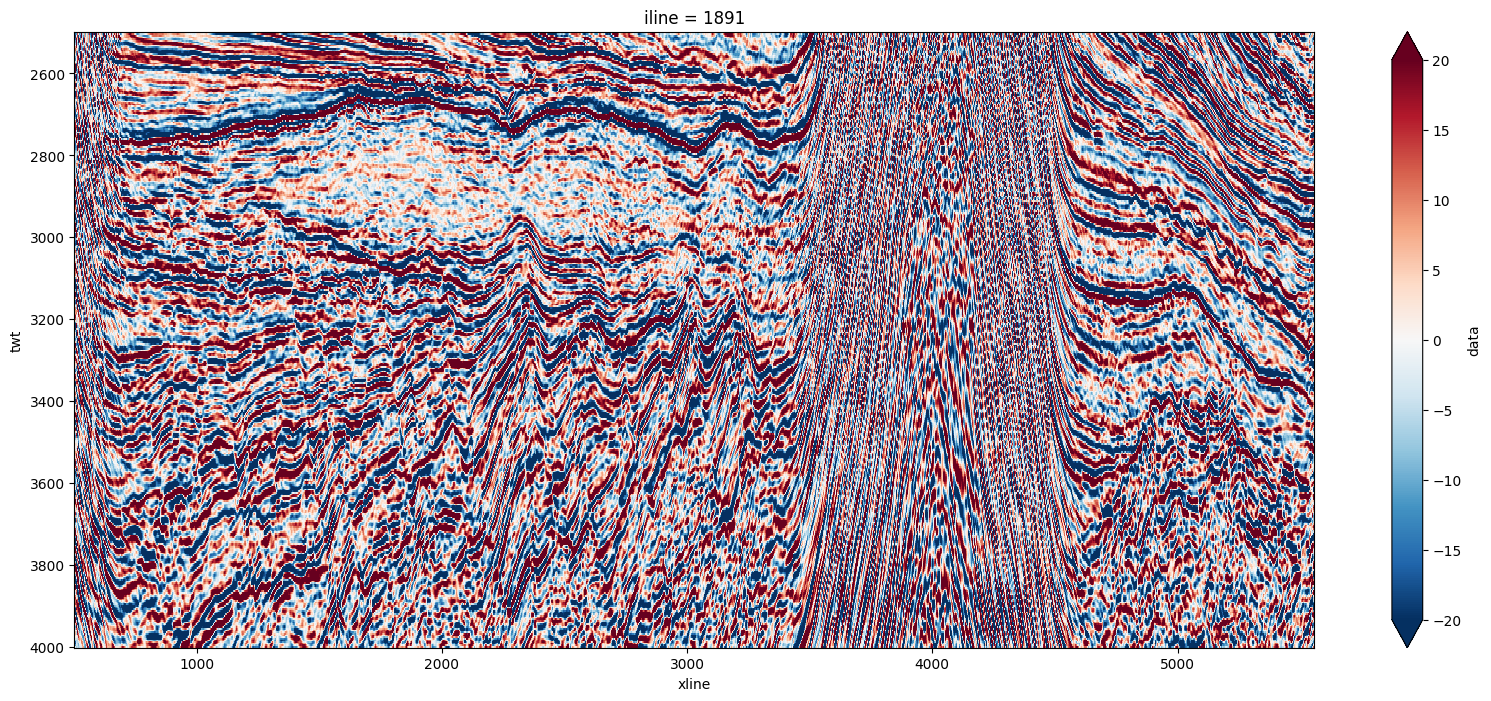

In [27]:

seisnc_vol.sel(iline=1891).data.T.plot(yincrease=False, figsize=(20, 8), vmax=20)

In [50]:
seisnc_vol_inline_1891 = segy_loader(segy_file,ix_crop=(1891, 1891,2500,2508))

  0%|          | 0.00/1.09M [00:00<?, ? traces/s]

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/1.09M [00:00<?, ? traces/s]

In [42]:
seisnc_vol_iline_block = segy_loader(
    segy_file,
    head_df=trace_headers[trace_headers["INLINE_3D"] <= 1900].copy()
)

Loading as 3D
Fast direction is INLINE_3D


Converting SEGY:   0%|          | 0.00/1.09M [00:00<?, ? traces/s]

In [43]:
print(seisnc_vol_iline_block)


<xarray.Dataset>
Dimensions:  (iline: 230, xline: 1264, twt: 376)
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 1883 1887 1891 1895 1899
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (iline, xline) float32 4.161e+05 4.161e+05 ... 3.788e+05 3.788e+05
    cdp_y    (iline, xline) float32 8.448e+06 8.448e+06 ... 8.501e+06 8.501e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 ... -1.0 2.0 -4.0 -8.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         FullStack_Decim.sgy
    srd:                 None
    datatype:            None
    percentiles:     

In [38]:
# dataset anatomy - dimensions, coordinates, variables, attributes - DataArray vs Dataset
seisnc_vol

<xarray.Dataset>
Dimensions:  (iline: 860, xline: 1264, twt: 376)
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (iline, xline) float32 4.161e+05 4.161e+05 ... 4.092e+05 4.092e+05
    cdp_y    (iline, xline) float32 8.448e+06 8.448e+06 ... 8.538e+06 8.538e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         FullStack_Decim.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-7.667897967891823e-153, -7.422421647592975e-153, -...
    coord_scalar:        -10.0

In [47]:
# data as numpy array
seisnc_vol.attrs.keys()

dict_keys(['ns', 'sample_rate', 'text', 'measurement_system', 'd3_domain', 'epsg', 'corner_points', 'corner_points_xy', 'source_file', 'srd', 'datatype', 'percentiles', 'coord_scalar'])

In [40]:
print(seisnc_vol.dims)

Frozen({'iline': 860, 'xline': 1264, 'twt': 376})


In [49]:
seisnc_vol.sel(iline=1891)

<xarray.Dataset>
Dimensions:  (xline: 1264, twt: 376)
Coordinates:
    iline    uint16 1891
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (xline) float32 4.271e+05 4.27e+05 4.27e+05 ... 3.787e+05 3.787e+05
    cdp_y    (xline) float32 8.461e+06 8.461e+06 ... 8.501e+06 8.501e+06
Data variables:
    data     (xline, twt) float32 5.0 -2.0 -9.0 -10.0 ... -13.0 -10.0 1.0 13.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         FullStack_Decim.sgy
    srd:                 None
    datatype:            None
    percentiles:         [-7.667897967891823e-153, -7.422421647592975e-153, -...
    coord_scalar:        -10.0

In [62]:
seisnc_vol.data.min()

<xarray.DataArray 'data' ()>
array(-127., dtype=float32)

In [63]:
# We are adding a new attributes (blank) to our cube

blank = np.empty((860,1264,376))
seisnc_vol['blank'] = (("iline","xline", "twt"),blank)
print(seisnc_vol)

<xarray.Dataset>
Dimensions:  (iline: 860, xline: 1264, twt: 376)
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (iline, xline) float32 4.161e+05 4.161e+05 ... 4.092e+05 4.092e+05
    cdp_y    (iline, xline) float32 8.448e+06 8.448e+06 ... 8.538e+06 8.538e+06
Data variables:
    data     (iline, xline, twt) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    blank    (iline, xline, twt) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/13)
    ns:                  None
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    d3_domain:           None
    epsg:                None
    ...                  ...
    corner_points_xy:    None
    source_file:         FullStack_Decim.sgy

In [64]:
# output the data to netcdf
seisnc_vol.seisio.to_netcdf("/Users/kavehdehghan/Desktop/ML_WORKFLOW/Seismic_Data/FullStack_Decim.seisnc")

In [65]:
from segysak import open_seisnc
open_seisnc("/Users/kavehdehghan/Desktop/ML_WORKFLOW/Seismic_Data/FullStack_Decim.seisnc")

<xarray.Dataset>
Dimensions:  (iline: 860, xline: 1264, twt: 376)
Coordinates:
  * iline    (iline) uint16 983 987 991 995 999 ... 4403 4407 4411 4415 4419
  * xline    (xline) uint16 504 508 512 516 520 524 ... 5540 5544 5548 5552 5556
  * twt      (twt) float64 2.5e+03 2.504e+03 2.508e+03 ... 3.996e+03 4e+03
    cdp_x    (iline, xline) float32 ...
    cdp_y    (iline, xline) float32 ...
Data variables:
    data     (iline, xline, twt) float32 ...
    blank    (iline, xline, twt) float64 ...
Attributes: (12/13)
    sample_rate:         4.0
    text:                C01   SEG-Y exported from OpendTect 7.0.6b at Thu 08...
    measurement_system:  m
    source_file:         FullStack_Decim.sgy
    percentiles:         [-7.66789797e-153 -7.42242165e-153 -3.31745520e-153 ...
    coord_scalar:        -10.0
    ...                  ...
    d3_domain:           None
    epsg:                None
    corner_points:       None
    corner_points_xy:    None
    srd:                 None
    datatype:            None

In [67]:
from segysak.segy import segy_writer
help(segy_writer)

Help on function segy_writer in module segysak.segy._segy_writer:

segy_writer(seisnc, segyfile, trace_header_map=None, il_chunks=None, dimension=None, silent=False, use_text=False)
    Convert siesnc format (NetCDF4) to SEGY.
    
    Args:
        seisnc (xarray.Dataset, string): The input SEISNC file either a path or the in memory xarray.Dataset
        segyfile (string): The output SEG-Y file
        trace_header_map (dict, optional): Defaults to None. A dictionary of seisnc variables
            and byte locations. The variable will be written to the trace headers in the
            assigned byte location. By default CMP=23, cdp_x=181, cdp_y=185, iline=189,
            xline=193.
        il_chunks (int, optional): The size of data to work on - if you have memory
            limitations. Defaults to 10. This is primarily used for large 3D and ignored for 2D data.
        dimension (str): Data dimension to output, defaults to 'twt' or 'depth' whichever is present
        silent (boo

In [68]:
test = seisnc_vol.copy()
test.attrs = {"coord_scalar":-100, "sample_rate":4.0, "source_file":""}

In [69]:
#export in memory dataset to segy
segy_writer(test,"/Users/kavehdehghan/Desktop/ML_WORKFLOW/Seismic_Data/FullStack_Decim_test.segy",trace_header_map={"iline":21})

Writing to SEG-Y:   0%|          | 0/1087040 [00:00<?, ? traces/s]